In [5]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [6]:
# url = f'https://dvf-api.data.gouv.fr/dvf/csv/?dep=1'
# pd.read_csv(url)

In [7]:
# # getting all departments
# dep = []
# for i in range(95):
#     url = f'https://dvf-api.data.gouv.fr/dvf/csv/?dep={i+1}'
#     dep.append(pd.read_csv(url))


In [8]:
df_dvf = pd.read_csv('../raw_data/dvf_93.csv')

df_dvf.shape

/var/folders/2q/7w7k0ry17v97h97m770w84rm0000gn/T/ipykernel_10627/2080675276.py:1: DtypeWarning: Columns (2,4,5,9,10,12,13,14,16,17,18,19,20,21,22,23,24,25,26,27,28,29,31,32,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df_dvf = pd.read_csv('../raw_data/dvf_93.csv')


(271360, 41)

In [ ]:
df_raw = df_dvf.copy()
df_raw = df_raw.astype

In [9]:
df_dvf['code_departement']

0         93
1         93
2         93
3         93
4         93
          ..
271355    93
271356    93
271357    93
271358    93
271359    93
Name: code_departement, Length: 271360, dtype: object

# Exploring

In [10]:
df_dvf.duplicated().sum()

77094

In [11]:
df_dvf['nature_mutation'].unique()

array(["Vente en l'état futur d'achèvement", 'Vente', 'Expropriation',
       'Echange', 'Vente terrain à bâtir', 'Adjudication',
       'nature_mutation'], dtype=object)

In [12]:
df_dvf['nature_mutation'].value_counts()

nature_mutation
Vente                                 188594
Vente en l'état futur d'achèvement     78211
Adjudication                            2066
Expropriation                           1556
Echange                                  739
Vente terrain à bâtir                    189
nature_mutation                            5
Name: count, dtype: int64

In [13]:
df_dvf.dtypes

id_mutation                     object
date_mutation                   object
numero_disposition              object
nature_mutation                 object
valeur_fonciere                 object
adresse_numero                  object
adresse_suffixe                 object
adresse_nom_voie                object
adresse_code_voie               object
code_postal                     object
code_commune                    object
nom_commune                     object
code_departement                object
ancien_code_commune             object
ancien_nom_commune              object
id_parcelle                     object
ancien_id_parcelle              object
numero_volume                   object
lot1_numero                     object
lot1_surface_carrez             object
lot2_numero                     object
lot2_surface_carrez             object
lot3_numero                     object
lot3_surface_carrez             object
lot4_numero                     object
lot4_surface_carrez      

In [14]:
df_dvf.columns

Index(['id_mutation', 'date_mutation', 'numero_disposition', 'nature_mutation',
       'valeur_fonciere', 'adresse_numero', 'adresse_suffixe',
       'adresse_nom_voie', 'adresse_code_voie', 'code_postal', 'code_commune',
       'nom_commune', 'code_departement', 'ancien_code_commune',
       'ancien_nom_commune', 'id_parcelle', 'ancien_id_parcelle',
       'numero_volume', 'lot1_numero', 'lot1_surface_carrez', 'lot2_numero',
       'lot2_surface_carrez', 'lot3_numero', 'lot3_surface_carrez',
       'lot4_numero', 'lot4_surface_carrez', 'lot5_numero',
       'lot5_surface_carrez', 'nombre_lots', 'code_type_local', 'type_local',
       'surface_reelle_bati', 'nombre_pieces_principales',
       'code_nature_culture', 'nature_culture', 'code_nature_culture_speciale',
       'nature_culture_speciale', 'surface_terrain', 'longitude', 'latitude',
       'section_prefixe'],
      dtype='object')

In [15]:
df_dvf.isnull().sum()

id_mutation                          0
date_mutation                        0
numero_disposition                   0
nature_mutation                      0
valeur_fonciere                   2591
adresse_numero                   29402
adresse_suffixe                 259219
adresse_nom_voie                 10195
adresse_code_voie                10195
code_postal                      10195
code_commune                         0
nom_commune                          0
code_departement                     0
ancien_code_commune             270288
ancien_nom_commune              270288
id_parcelle                          0
ancien_id_parcelle              271355
numero_volume                   269411
lot1_numero                      68751
lot1_surface_carrez             226795
lot2_numero                     224988
lot2_surface_carrez             259418
lot3_numero                     265455
lot3_surface_carrez             270341
lot4_numero                     269360
lot4_surface_carrez      

In [16]:
df_dvf[['code_postal', 'code_commune', 'nom_commune']].isnull().sum()/len(df_dvf)

code_postal     0.03757
code_commune    0.00000
nom_commune     0.00000
dtype: float64

In [17]:
df_dvf['nombre_lots'].astype('str').value_counts()

nombre_lots
1              156237
0               68751
2               40467
3                3905
4                1109
5                 432
6                 185
7                 114
9                  40
8                  38
10                 18
12                  8
13                  6
11                  6
nombre_lots         5
15                  5
27                  4
28                  4
45                  3
20                  3
19                  3
16                  2
34                  2
31                  2
14                  2
22                  2
95                  1
198                 1
120                 1
18                  1
21                  1
61                  1
17                  1
Name: count, dtype: int64

In [18]:
df_dvf['type_local'].unique()

array([nan, 'Appartement', 'Dépendance',
       'Local industriel. commercial ou assimilé', 'Maison', 'type_local'],
      dtype=object)

# 🔅 Preprocessing

## 🧹 Keep only useful columns and rows and translate

### Removing columns

In [19]:
keep_col =['date_mutation',
            'nature_mutation',
            'valeur_fonciere',
            'code_postal',
            'code_commune',
            'code_departement',
            'nombre_lots',
            'type_local',
            'surface_reelle_bati',
            'nombre_pieces_principales',
            'longitude',
            'latitude']
df_dvf = df_dvf[keep_col]

df_dvf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   date_mutation              271360 non-null  object
 1   nature_mutation            271360 non-null  object
 2   valeur_fonciere            268769 non-null  object
 3   code_postal                261165 non-null  object
 4   code_commune               271360 non-null  object
 5   code_departement           271360 non-null  object
 6   nombre_lots                271360 non-null  object
 7   type_local                 208331 non-null  object
 8   surface_reelle_bati        121084 non-null  object
 9   nombre_pieces_principales  208146 non-null  object
 10  longitude                  267372 non-null  object
 11  latitude                   267372 non-null  object
dtypes: object(12)
memory usage: 24.8+ MB


### Translate column-names

In [20]:
df_dvf.columns = ['date', 'built', 'price', 'postal_code',
                'city', 'region', 'number_of_units', 'property_type',
                'living_area', 'number_of_rooms',
                'longitude', 'latitude']

### Remove non-representative rows

In [21]:
df_dvf.shape

(271360, 12)

In [22]:
df_dvf['built'].unique()

array(["Vente en l'état futur d'achèvement", 'Vente', 'Expropriation',
       'Echange', 'Vente terrain à bâtir', 'Adjudication',
       'nature_mutation'], dtype=object)

In [23]:
df_dvf.shape

(271360, 12)

In [24]:
df_dvf['built'].unique()

array(["Vente en l'état futur d'achèvement", 'Vente', 'Expropriation',
       'Echange', 'Vente terrain à bâtir', 'Adjudication',
       'nature_mutation'], dtype=object)

We want to keep only :
- Houses and appartments
- Normal sales and off-plan sales
- Sales with only one unit

In [25]:
df_dvf['built'].unique()

array(["Vente en l'état futur d'achèvement", 'Vente', 'Expropriation',
       'Echange', 'Vente terrain à bâtir', 'Adjudication',
       'nature_mutation'], dtype=object)

In [26]:
print('Shape before the masks : ', df_dvf.shape)
print('Shape only normal sales', df_dvf[((df_dvf['built'] == "Vente") | (df_dvf['built'] == "Vente en l'état futur d'achèvement"))].shape)
print('Shape only 1 unit', df_dvf[((df_dvf['number_of_units'] == 1) | (df_dvf['number_of_units'] == '1'))].shape)
print('Shape only house and appartments', df_dvf[((df_dvf['property_type'] == 'Appartement') | (df_dvf['property_type'] == 'Maison'))].shape)

Shape before the masks :  (271360, 12)
Shape only normal sales (266805, 12)
Shape only 1 unit (156237, 12)
Shape only house and appartments (110400, 12)


In [27]:
df_useful = df_dvf[((df_dvf['built'] == "Vente") | (df_dvf['built'] == "Vente en l'état futur d'achèvement")) &
                    ((df_dvf['number_of_units'] == 1) | (df_dvf['number_of_units'] == '1')) &
                    ((df_dvf['property_type'] == 'Appartement') | (df_dvf['property_type'] == 'Maison'))]
df_useful.shape

(42354, 12)

In [28]:
## checking that the masks worked correctly
print(df_useful['built'].unique())
print(df_useful['number_of_units'].unique())
print(df_useful['property_type'].unique())


['Vente' "Vente en l'état futur d'achèvement"]
[1 '1']
['Appartement' 'Maison']


### Translating the values

In [29]:
trans_dict_built = {'Vente' : 'built',
                    'Vente en l’état futur d’achèvement' : 'off-plan'}
trans_dict_type = {'Appartement' : 'appartment',
                   'Maison' : 'house'}
df_useful= df_useful.replace({'built' : trans_dict_built,
                             'property type' : trans_dict_type})

In [30]:
# checking we didn't lose rows
df_useful.shape

(42354, 12)

## Dropping duplicates and NaNs

In [46]:
‚

(30655, 11)

In [32]:
## dropping the column with number of units (only 1s)
df_useful = df_useful.drop(columns='number_of_units')

In [33]:
df_useful.columns

Index(['date', 'built', 'price', 'postal_code', 'city', 'region',
       'property_type', 'living_area', 'number_of_rooms', 'longitude',
       'latitude'],
      dtype='object')

In [34]:
## checking for NaN values
df_useful.isna().sum()
df_useful = df_useful.dropna()
df_useful.shape
df_useful = df_useful.drop_duplicates()
df_useful.shape

(30655, 11)

## Changing everything to the right type

In [44]:
df_useful['living_area'] = df_useful['living_area'].astype('float')

In [42]:
col_float = ['price', 'longitude', 'latitude', 'postal_code', 'living_area', 'number_of_rooms']
col_string = ['built','city', 'region','property_type']
col_date = ['date']
### Formating data types ####
df_useful[col_float] = df_useful[col_float].apply(lambda x: pd.to_numeric(x, errors='coerce').astype('float64'))
df_useful[col_date]= df_useful[col_date].apply(lambda x: pd.to_datetime(x, errors='coerce'))
df_useful[col_string]= df_useful[col_int].apply(lambda).astype('int64')

df_useful.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30655 entries, 61 to 262139
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             30655 non-null  datetime64[ns]
 1   built            30655 non-null  object        
 2   price            30655 non-null  float64       
 3   postal_code      30655 non-null  float64       
 4   city             30655 non-null  object        
 5   region           30655 non-null  object        
 6   property_type    30655 non-null  object        
 7   living_area      30655 non-null  float64       
 8   number_of_rooms  30655 non-null  float64       
 9   longitude        30655 non-null  float64       
 10  latitude         30655 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 2.8+ MB


In [36]:
df_useful.shape

(30655, 11)

In [37]:
df_useful.head()

,date,built,price,postal_code,city,region,property_type,living_area,number_of_rooms,longitude,latitude
61,2021-01-04,built,483400.0,93170.0,93006,93,Appartement,74.0,3.0,2.423187,48.858609
62,2021-01-07,built,170000.0,93130.0,93053,93,Appartement,42.0,2.0,2.465074,48.887137
65,2021-01-06,built,55000.0,93700.0,93029,93,Appartement,26.0,1.0,2.455386,48.914226
83,2021-01-11,built,252000.0,93230.0,93063,93,Appartement,50.0,2.0,2.440520,48.882042
85,2021-01-11,built,151190.0,93700.0,93029,93,Appartement,53.0,2.0,2.463303,48.913323


<Axes: xlabel='longitude', ylabel='latitude'>

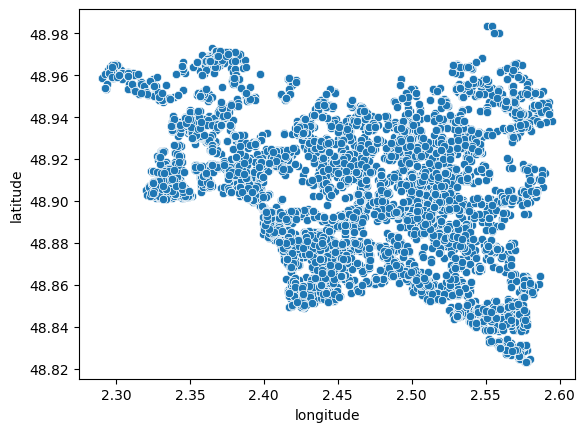

In [38]:
# import folium
# m = folium.Map(location = [-33.8, 151.2], tiles ='OpenStreetMap', zoom_start=11)
import seaborn as sns
sns.scatterplot(x = df_useful['longitude'], y = df_useful['latitude'])

## 🤓 Feature engineering

In [39]:
df_dvf['prix_m_2'] = df_dvf['valeur_fonciere']/ df_dvf['surface_reelle_bati']



df_dvf.head(5)

KeyError: 'valeur_fonciere'

In [ ]:
df_dvf['surface_terrain'].fillna(value=0, inplace=True)

df_dvf.head(5)

In [ ]:
df_dvf.info()

In [ ]:
df_dvf.head(5)

In [ ]:
import project

In [ ]:
df_dvf